In [65]:
print,"Hello world, IDL is running"

Hello world, IDL is running

# SolarSoft in a Jupyter Notebook
## /efs/solarsoft/IDLSSWtest.ipynb
We set up SolarSoft with the Jupyter Notebook modifications.  Also, we present several examples of plotting in a Notebook in general. We then present specific SolarSoft examples.

First, let us set up the Jupyter SolarSoft environment.  You will need to determine which 'SSW' base install directory exists; on the SMCE HelioCloud, this is in /efs/solarsoft.  The @jssw-setup.pro routine will add this SSW base and your home directory to the IDL search path.

Now a terrible hack needed because, for some reason, IDL-Jupyter gets messed up if you set the path in a previous session.

In [ ]:
file_delete,'~/.idl/idl/pref-10-idl_8_8-unix/idl.pref',/VERBOSE

% FILE_DELETE: Removed file: /home/jovyan/.idl/idl/pref-10-idl_8_8-unix/idl.pref.

## A note on IDL loops in Jupyter
When doing a block of code in a cell in Jupyter, you need to add an extra 'END' to the, well, end of the block.

In [ ]:
FOR i=1,5 do begin
    print,i
ENDFOR
END

## A simple pair of plotting, image examples

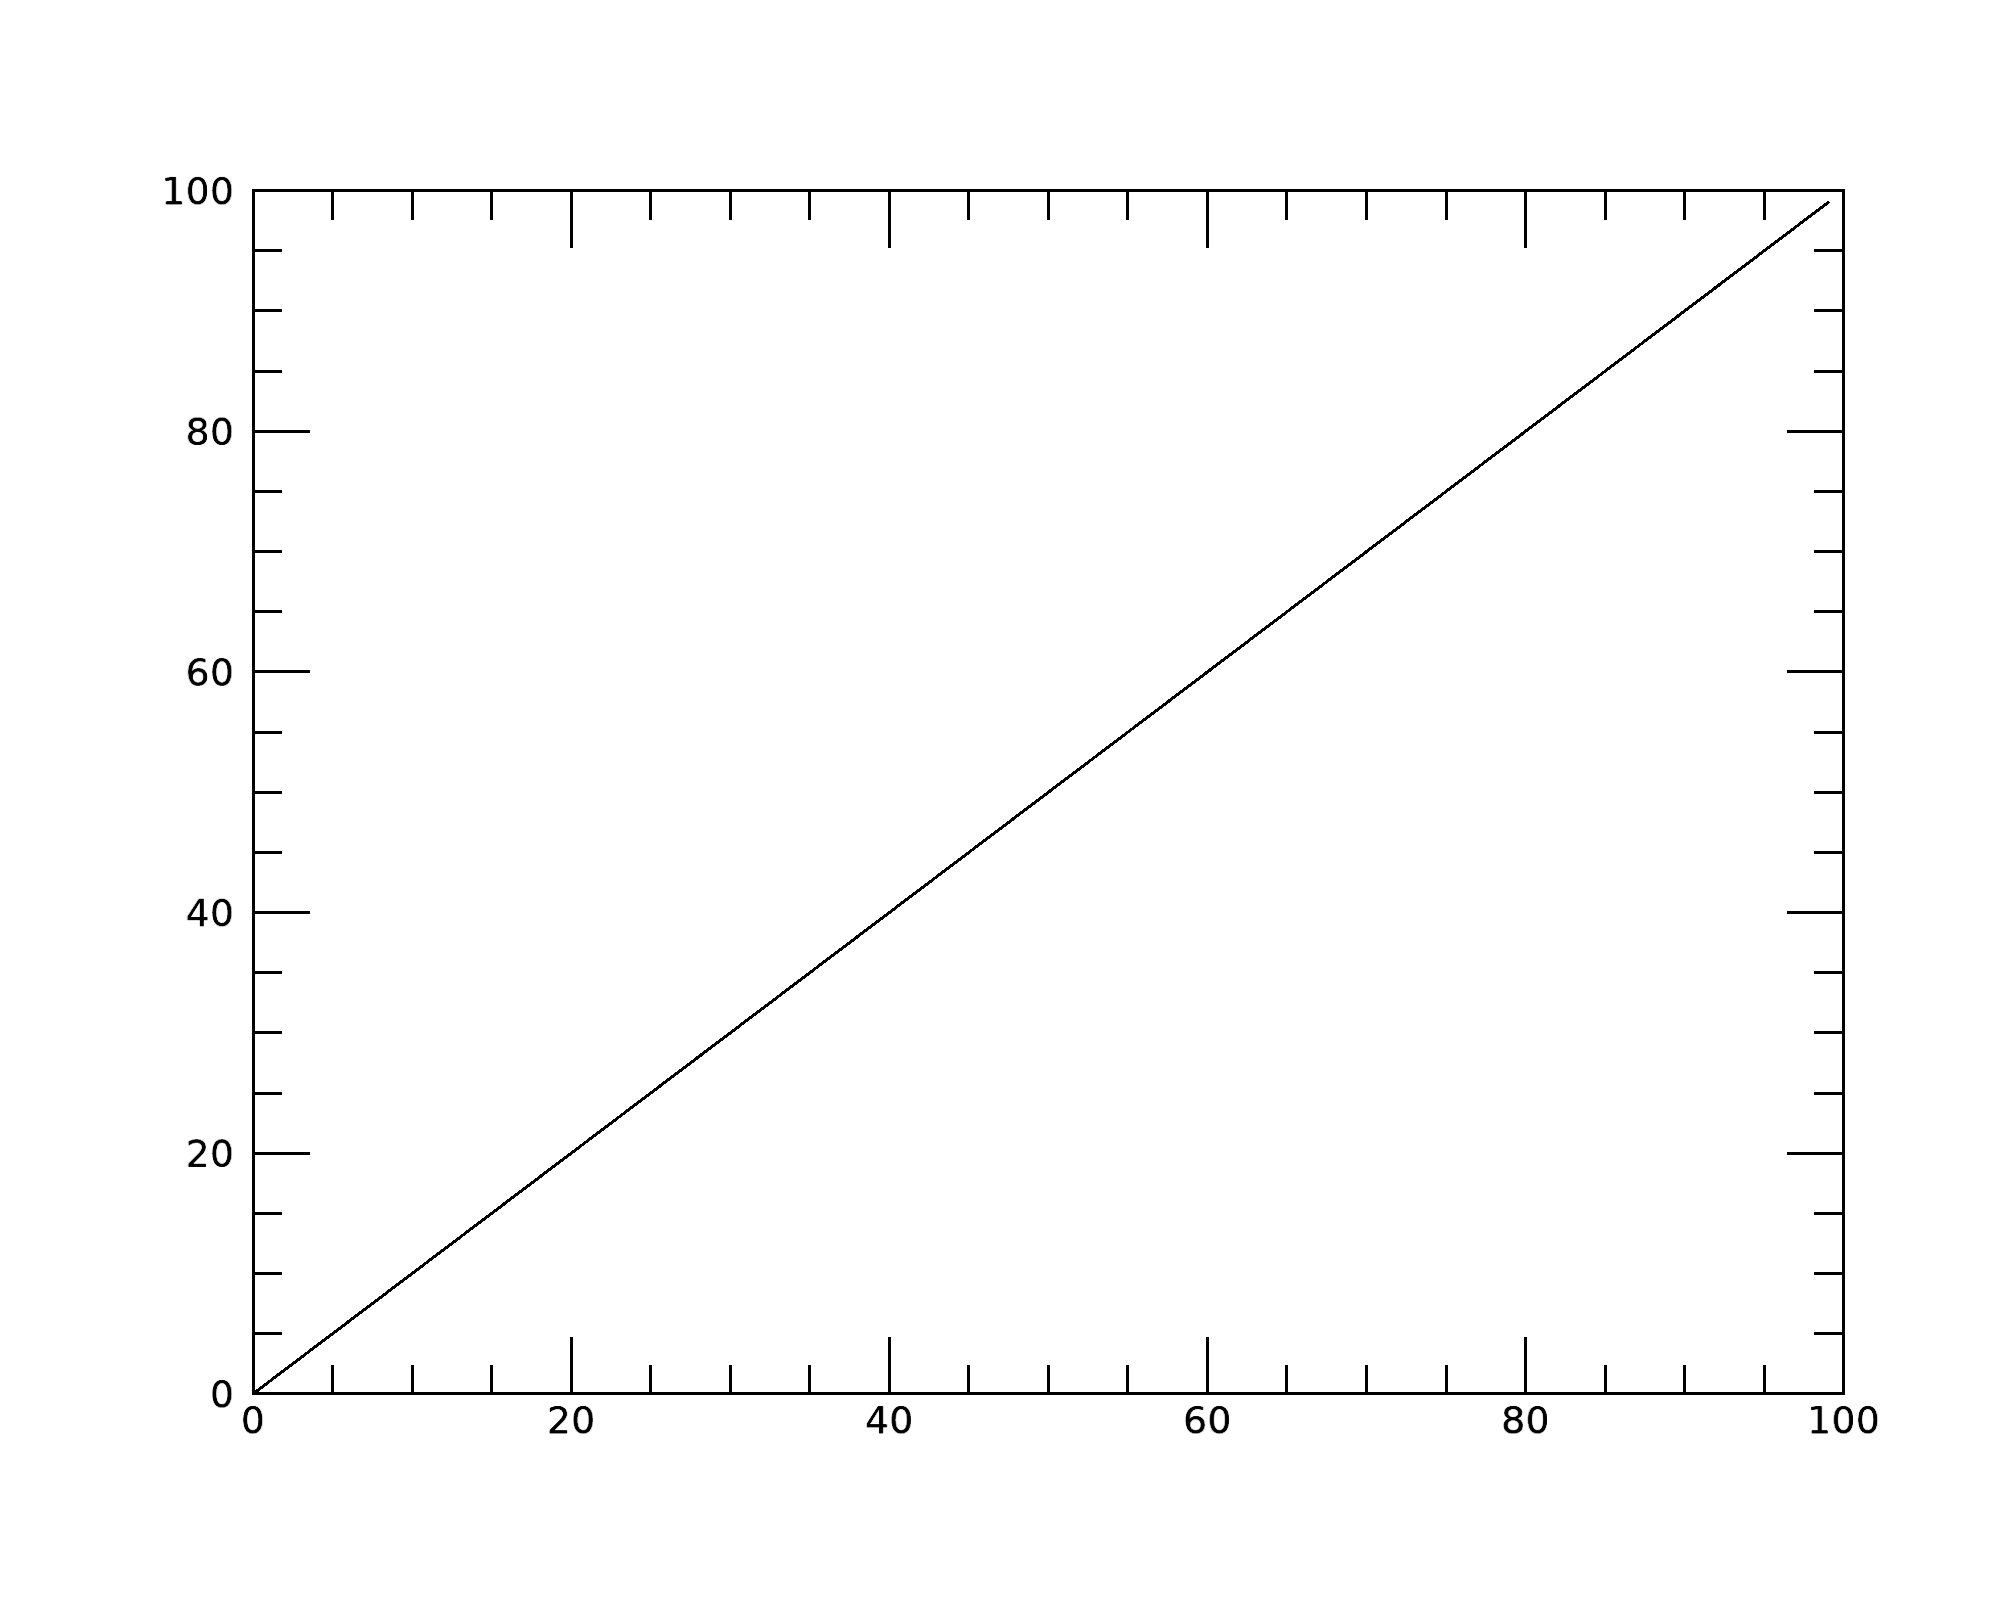

In [68]:
data=findgen(100)
p=plot(data)
imdata=findgen(100,100)
t=image(imdata)

In [2]:
; Prepping for local jupyter so it can override idl default routines we need

setenv,'SSW=/efs/solarsoft'
;   this is often required; IDL Jupyter has a problem with legacy paths.
file_delete,'~/.idl/idl/pref-10-idl_8_8-unix/idl.pref',/VERBOSE,/QUIET
; make a local copy of the SolarSoft config file so you can edit yours.  This is a safe copy,
; if the file already exists it will not overwrite.
file_copy,getenv('SSW')+'/jnpro/jssw_setup.pro','jssw_setup.pro',/ALLOW_SAME
.run jssw_setup

;   Setting local jupyter so it can override idl default routines we need-- done in jssw_setup.pro
;   or you can set manually with:
; pref_set,'IDL_PATH',getenv('SSW')+':+<IDL_DEFAULT>:+'+getenv('HOME'),/COMMIT
;   likewise SSWDB is needed for your individual access as well, default is HOME/sswdb but can be
;   overwritten if you set SSWDB
;setenv,'SSWDB='+getenv('HOME')+'/sswdb'
; this one toggles the plot/oplot/tv/tvscl/xyout replacements
; (this is also set if one uses the jssw_setup.pro routine)
;setenv,'SSWJUPYTER=1'

; MIGHT need some additions here for other missions
;setenv,'SSW_SOHO_INSTR=soho/cds soho/eit soho/sumer soho/lasco soho/mdi soho/uvcs'
;setenv,'SSW_STEREO_INSTR=stereo/impact stereo/plastic stereo/secchi stereo/swaves stereo/ssc'
;setenv,'SSW_PSP_INSTR=psp/fields psp/isis psp/wispr psp/sweap'

% FILE_COPY: Destination file already exists. File: jssw_setup.pro. % Execution halted at: $MAIN$

% SET_LOGENV: setenv,SSW_SUNSPICE_GEN=SSW_SUNSPICE/data

In [4]:
print,getenv('SSW')
print,getenv('SSWDB')
print,getenv('SSW_MISSIONS')
print,getenv('SSW_INSTR')

/efs/solarsoft

/home/jovyan/sswdb

In [5]:
; USER CHOICE: as user, need to set these choices an appropriate set of values
setenv,'SSW_INSTR=gen stereo secchi psp festival s3drs lasco'

;setenv,'SSW_MISSIONS=soho yohkoh spartan trace cgro smm packages hessi radio optical hxrs smei goes goesr goesn hinode vobs stereo proba2 iris hic so psp'
;setenv,'SSW_MISSION=soho packages stereo psp'

In [6]:
spawn,'which ls'

/usr/bin/ls

## Checking SSW path
Let us make sure it can find our solarsoft routines (that the path is properly set).

In [8]:
; Forcing local jupyter so it can override idl default routines we need
;pref_set,'IDL_PATH','<IDL_DEFAULT>:+/efs/solarsoft/jnpro:+/efs/solarsoft:+/efs/skantunes/supermag:+.',/COMMIT

In [9]:
; This should point to more.pro in SSW
print,file_which('more.pro')

/home/jovyan/efs/solarsoft/gen/idl/string/more.pro

In [12]:
; show one of the new graphics routines
print,file_which('jnplot.pro')

/home/jovyan/efs/solarsoft/jnpro/jnplot.pro

## Sample invocation of the pass-thru SolarSoft method

1

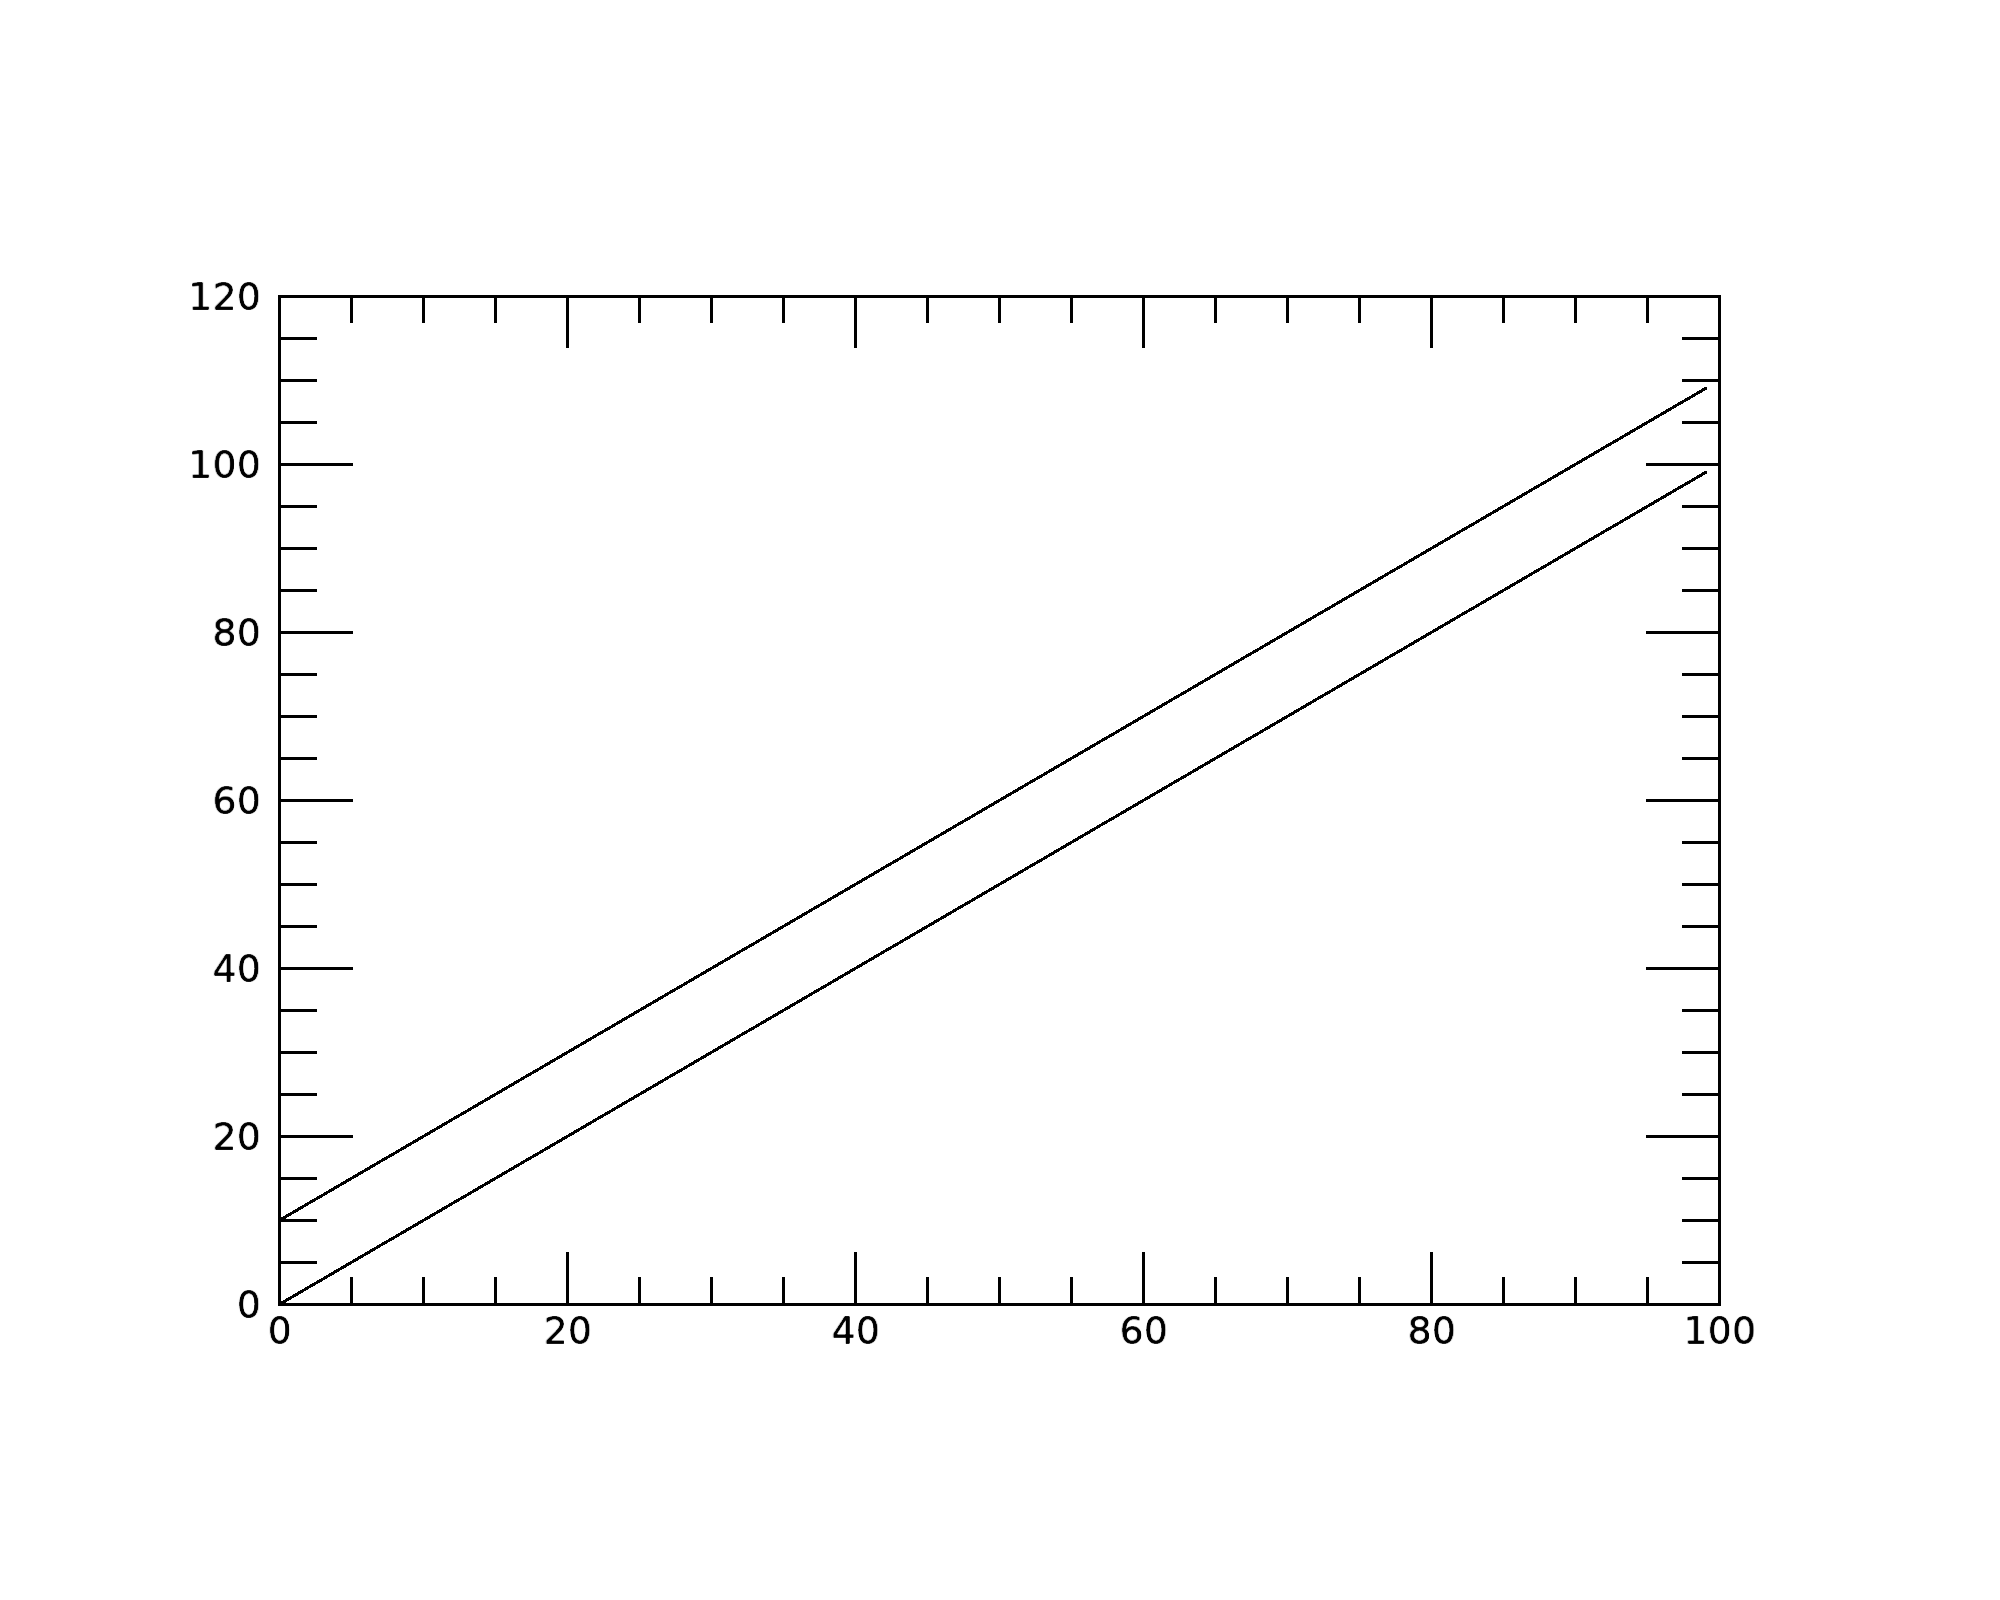

In [59]:
COMMON JNSSW, jn_plot, jn_tv
.com jnplot
d1=findgen(100)
d2=findgen(100)+10
jnplot,d1,title='Simple plot'
jnplot,/overplot,d2

## Using pass-thru catcher routine 'jntv' instead of tv or tvscl

In [63]:
print,file_which('jntv.pro')
.com jntv
imdata=findgen(100,100)
print,size(imdata)
jntv,imdata
jntv,/scale,imdata

/home/jovyan/efs/solarsoft/jnpro/jntv.pro

1

2 100 100 4 10000

In [150]:
t=image(findgen(100,100))

% WIDGET_CONTROL: Unable to connect to X Windows display: :0.0 % IMAGE: WIDGET_CONTROL: Unable to open X Windows display. Is your DISPLAY environment variable set correctly? % Execution halted at: FITS_INTERP 265 /home/jovyan/efs/solarsoft/yohkoh/ucon/soft/labonte/fits_interp.pro % MREADFITS 198 /home/jovyan/efs/solarsoft/gen/idl/fits/mreadfits.pro % SCCREADFITS 125 /home/jovyan/efs/solarsoft/stereo/secchi/idl/sccgen/sccreadfits.pro % QUICKFITTEST 568 /efs/solarsoft/jnpro/demo/quickfittest.pro % $MAIN$

# Demoes

In [94]:
cd,getenv('SSW')+'/jnpro/demo'

In [96]:
print,file_which('scclister.pro')

/home/jovyan/efs/solarsoft/stereo/secchi/idl/database/scclister.pro

## Test of secchi_prep with EUV data

In [109]:
setenv,"SECCHI_LZ='+getenv('SSW')+'/jnpro/demo/euvi"
;.com scclister
;sccingest,'/home/jovyan/data/euvi/L0/a/img/euvi/20070401'
;sccingest('euvi')
;f=scclister()
flist = FILE_SEARCH('/efs/solarsoft/jnpro/demo/euvi/*.fts')
print,flist

/efs/solarsoft/jnpro/demo/euvi/20070401_000400_n4euA.fts /efs/solarsoft/jnpro/demo/euvi/20070401_000630_n4euA.fts
/efs/solarsoft/jnpro/demo/euvi/20070401_000900_n4euA.fts /efs/solarsoft/jnpro/demo/euvi/20070401_001130_n4euA.fts
/efs/solarsoft/jnpro/demo/euvi/20070401_001145_n4euA.fts /efs/solarsoft/jnpro/demo/euvi/20070401_001200_n4euA.fts
/efs/solarsoft/jnpro/demo/euvi/20070401_001400_n4euA.fts /efs/solarsoft/jnpro/demo/euvi/20070401_001630_n4euA.fts
/efs/solarsoft/jnpro/demo/euvi/20070401_001900_n4euA.fts /efs/solarsoft/jnpro/demo/euvi/20070401_002052_n4euA.fts
/efs/solarsoft/jnpro/demo/euvi/20070401_002130_n4euA.fts /efs/solarsoft/jnpro/demo/euvi/20070401_002145_n4euA.fts
/efs/solarsoft/jnpro/demo/euvi/20070401_002200_n4euA.fts /efs/solarsoft/jnpro/demo/euvi/20070401_002400_n4euA.fts

In [113]:
;flist = FILE_SEARCH('euvi/*.fts')
secchi_prep,'/efs/solarsoft/jnpro/demo/euvi/20070401_002200_n4euA.fts',hdr,img
;secchi_prep,flist,myhdrs,myimgs,rotate=1,/smask,/interp

$Id: secchi_prep.pro,v 1.58 2013/11/07 10:34:45 nathan Exp $ FILENAMES STRING = '/efs/solarsoft/jnpro/demo/euvi/20070401_002200_n4euA.fts' % Attempt to subscript TYPECODE with SZ is out of range. % Execution halted at: SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 271 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 271 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % $MAIN$

## SolarSoft-- reading a FITS file

In [116]:
testfile = getenv('SSW') + '/jnpro/demo/psp_L2_wispr_20181101T013030_V3_2222.fits'
print,testfile
fitsdata=sccreadfits(testfile,header)
print,size(fitsdata)
print,header

/efs/solarsoft/jnpro/demo/psp_L2_wispr_20181101T013030_V3_2222.fits

0 2 1

SIMPLE = T / Written by IDL: Thu Sep 24 12:10:46 2020 
BITPIX = -64 / Real*8 (double precision) 
NAXIS = 2 / 
NAXIS1 = 960 / 
NAXIS2 = 1024 / 
FILENAME= 'psp_L2_wispr_20181101T013030_V3_2222.fits' / 
FILE_RAW= 'CmpB.109D1D40' / 
APID = '41b ' / 
DATE = '2020-09-24T03:29:31.326' / 
DATE-OBS= '2018-11-01T01:30:30.232' / 
DATE-BEG= '2018-11-01T01:30:30.232' / 
DATE-AVG= '2018-11-01T01:32:31.218' / 
DATE-END= '2018-11-01T01:34:32.204' / 
OBT_BEG = 278731848.850 / 
OBT_END = 278732073.004 / 
NSUMEXP = 12 / 
NSUMBAD = 0 / 
XPOSURE = 184.320 / 
IP_TIMET= 19 / 
READTIME= 2.45760 / 
TELAPSE = 241.972 / 
TIMESYS = 'UTC ' / 
LEVEL = 'L2 ' / 
CREATOR = 'wispr_reduce.pro,v 1.65' / 
ORIGIN = 'NRL ' / 
DETECTOR= 2 / 
REGION = 2 / 
READOUT0= 3 / 
CAMERA = 'FMCFMD ' / 
CICUCODE= '101 ' / 
DRBUCODE= '122 ' / 
DRB1UCOD= '122 ' / 
DRB2UCOD= '122 ' / 
OBJECT = 'Subfield' / 
OBS_MODE= 'SYNOPTIC' / 
TARGET = 'D1_outer2roiHG_biasimg.os' / 
TIMELINE= '6,0x078dc' / 
STUDY_ID= 324 / 
STUDYCNT= 2 / 
VERS_CAL= '20200915' / 
PRIORITY= 1 / 
VERSION = 3 / 
FINAL = T / 
BSCALE = 1.00000 / 
BZERO = 0.00000 / 
BUNIT = 'MSB ' / 
DATAMIN = 8.38941E-14 / 
DATAMAX = 7.40360E-11 / 
BLANK = 61166 / 
PXBEG1 = 1 / 
PXEND1 = 2048 / 
PXBEG2 = 1 / 
PXEND2 = 1920 / 
R1COL = 1 / 
R2COL = 1920 / 
R1ROW = 1 / 
R2ROW = 2048 / 
RECTIFY = T / 
RECTROTA= 6 / 
NBIN1 = 2 / 
NBIN2 = 2 / 
NBIN = 4.00000 / 
COMPRESS= 'Lossless' / 
COMP_RAT= 0.446014 / 
COSMICR = T / 
DSTART1 = 1 / 
DSTOP1 = 955 / 
DSTART2 = 145 / 
DSTOP2 = 880 / 
IMGCTR = 60601 / 
CCIMGSEQ= 17920 / 
CCEXPCTL= 999 / 
CCIMGCTR= 27 / 
COSMICS = 2549 / 
CAMSATPX= 2 / 
CAMSTRVX= 16550 / 
IP_INIT = 2 / 
IPIMBUFF= 30840 / 
IPCMBUFF= 320 / 
IPSATPX = 16000 / 
IPSTRVPX= 300 / 
IPMINPX = 0 / 
IPMAXPX = 16383 / 
IPTRUNC = 0 / 
IPBIAS = 2 / 
IPCRSMUL= 4.00000 / 
IPBITSPP= 20 / 
IPMASK = 1 / 
IPMASKCR= '144,879,0,959' / 
LEDSTATE= 'Off ' / 
LEDDAC = 0 / 
OFFSET = 2256 / 
GAINCMD = 9 / 
GAINMODE= 'HIGH ' / 
IP_FUNC = 16584 / 
IPCMPCTL= 321 / 
XFBYTES = 1096124 / 
SCFLAGS = '0x0017ff3e' / 
CIE_T = -39.9500 / 
DRB1_T = -39.0940 / 
DET1_T = -70.9754 / 
DRB2_T = -38.8796 / 
DET2_T = -71.1319 / 
ISPREG0 = 10 / 
ISPREG1 = 70 / 
ISPREG2 = 61166 / 
ISPREG3 = 61166 / 
ISPREG4 = 61166 / 
ISPREG5 = 61166 / 
ISPREG6 = 821 / 
ISPREG7 = 324 / 
UCODREG0= 61166 / 
UCODREG1= 128 / 
UCODREG2= 0 / 
UCODREG3= 0 / 
UCODREG4= 1920 / 
UCODREG5= 61166 / 
UCODREG6= 61166 / 
UCODREG7= 61166 / 
DSUN_OBS= 35523558000.0 / 
SC_YAW = 0.0127409 / 
SC_PITCH= -0.000869923 / 
SC_ROLL = -4.03612 / 
DATAZER = 245760 / 
DATASAT = 1 / 
DSATVAL = 7.40360E-11 / 
DATAAVG = 2.25511E-12 / 
DATAMDN = 1.86879E-12 / 
DATASIG = 1.39622E-12 / 
DATAP01 = 5.66368E-13 / 
DATAP10 = 9.17246E-13 / 
DATAP25 = 1.28988E-12 / 
DATAP50 = 1.86879E-12 / 
DATAP75 = 2.85738E-12 / 
DATAP90 = 4.11966E-12 / 
DATAP95 = 4.96880E-12 / 
DATAP98 = 6.04365E-12 / 
DATAP99 = 7.11415E-12 / 
OBSRVTRY= 'Parker Solar Probe' / 
INSTRUME= 'WISPR ' / 
WCSNAME = 'Helioprojective Zenith Polynomial' / 
CTYPE1 = 'HPLN-ZPN' / 
CTYPE2 = 'HPLT-ZPN' / 
CUNIT1 = 'deg ' / 
CUNIT2 = 'deg ' / 
CRPIX1 = 492.366 / 
CRPIX2 = 513.185 / 
PC1_1 = 0.998317609888 / 
PC1_2 = 0.0579823230534 / 
PC2_1 = -0.0579823230534 / 
PC2_2 = 0.998317609888 / 
CDELT1 = 0.0564752 / 
CDELT2 = 0.0564752 / 
CRVAL1 = 76.6401135786 / 
CRVAL2 = -13.4498720625 / 
ATT_FILE= 'spp_2018_305_03.ah.bc' / 
PV1_1 = 0.00000000000 / 
PV1_2 = 90.0000000000 / 
PV1_3 = 180.000000000 / 
PV2_0 = 0.000168384998688 / 
PV2_1 = 0.983801007271 / 
PV2_2 = 0.0737626031041 / 
PV2_3 = -0.374471008778 / 
PV2_4 = 0.585762977600 / 
PV2_5 = -0.410706013441 / 
LONPOLE = 180.000000000 / 
LATPOLE = 0.00000000000 / 
CTYPE1A = 'RA---ZPN' / 
CTYPE2A = 'DEC--ZPN' / 
CUNIT1A = 'deg ' / 
CUNIT2A = 'deg ' / 
PC1_1A = 0.934969416065 / 
PC1_2A = -0.354728334115 / 
PC2_1A = 0.354728334115 / 
PC2_2A = 0.934969416065 / 
CRPIX1A = 492.366 / 
CRPIX2A = 513.185 / 
CRVAL1A = 173.529865843 / 
CRVAL2A = -3.92098920080 / 
CDELT1A = -0.0564752 / 
CDELT2A = 0.0564752 / 
PV1_1A = 0.00000000000 / 
PV1_2A = 

In [117]:
jntv,fitsdata

## Real case: fitting F-corona on WISPR images

In [118]:
wcs=fitshead2wcs(header)
center=wcs_get_pixel(wcs,[0,0])

% Attempt to call undefined procedure: 'DEFAULT'. % Execution halted at: FITS_INTERP 265 /home/jovyan/efs/solarsoft/yohkoh/ucon/soft/labonte/fits_interp.pro % MREADFITS 198 /home/jovyan/efs/solarsoft/gen/idl/fits/mreadfits.pro % SCCREADFITS 125 /home/jovyan/efs/solarsoft/stereo/secchi/idl/sccgen/sccreadfits.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 271 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 271 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % $MAIN$

% WCS_GET_PIXEL: Input not recognized as WCS structure % Execution halted at: FITS_INTERP 265 /home/jovyan/efs/solarsoft/yohkoh/ucon/soft/labonte/fits_interp.pro % MREADFITS 198 /home/jovyan/efs/solarsoft/gen/idl/fits/mreadfits.pro % SCCREADFITS 125 /home/jovyan/efs/solarsoft/stereo/secchi/idl/sccgen/sccreadfits.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 271 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 271 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % $MAIN$

In [120]:
.com cor2proc_wmodel

In [144]:
.com quickfittest
.com plot4_display

% Procedure was compiled while active: QUICKFITTEST. Returning.

In [145]:
;.com heliofcor
quickfittest,/wispr,/silent


/efs/solarsoft/jnpro/demo/psp_L2_wispr_20190405T091254_V3_2222.fits Ingesting/efs/solarsoft/jnpro/demo/psp_L2_wispr_20190405T091254_V3_2222.fits % Attempt to subscript TYPECODE with SZ is out of range. % Execution halted at: FITS_INTERP 265 /home/jovyan/efs/solarsoft/yohkoh/ucon/soft/labonte/fits_interp.pro % MREADFITS 198 /home/jovyan/efs/solarsoft/gen/idl/fits/mreadfits.pro % SCCREADFITS 125 /home/jovyan/efs/solarsoft/stereo/secchi/idl/sccgen/sccreadfits.pro % QUICKFITTEST 568 /efs/solarsoft/jnpro/demo/quickfittest.pro % $MAIN$

Now we have a fit in 'purefit.sav', and parameters in fitparams.sav.  We have to plot it.

In [ ]:
restore,/v,'purefit.sav'

In [ ]:
; grabbing some values to 'jam' the plotted dynamic range
imax=max(imgin)
iorig=imgfit3[0,0]

In [ ]:
help,imgin
i=image(imgin,dimensions=[256,256],RGB_TABLE=8)

In [ ]:
i=image(imgin,dimensions=[256,256],RGB_TABLE=2)

In [ ]:
imgfit3[0,0]=imax
j=image(imgfit3,dimensions=[256,256],RGB_TABLE=2)

In [ ]:
imgfit3[0,0]=iorig
j=image(imgfit3,dimensions=[256,256],RGB_TABLE=8)

In [ ]:
;diff=imgin-imgfit3
;k=image(diff,dimensions=[256,256],RGB_TABLE=9)

## SPICE Test, finding the SPICE library

In [146]:
; take 1, from Icy docs
dlm_register, '/efs/solarsoft/packages/sunspice/icy/linux_x86_64/lib/icy.dlm
pref_set,'IDL_DLM_PATH','/efs/skantunes/ssw-mini/packages/sunspice/icy/linux_x86_64/lib:<IDL_DEFAULT>',/COMMIT
print, cspice_tkvrsn( 'TOOLKIT' )
help, 'icy', /dlm

CSPICE_N0066

** ICY - IDL/CSPICE interface from JPL/NAIF (loaded)
 Version: 1.8.0, Build Date: 05-JAN-2017, Source: ed.wright@jpl.nasa.gov
 Path: /efs/solarsoft/packages/sunspice/icy/linux_x86_64/lib/icy.so

In [147]:
result=test_sunspice_dlm()
print,result

1

In [149]:
; take 2, from packages/sunspice/setup
setup_sunspice
register_sunspice_dlm
setenv,'SSW_SUNSPICE_GEN=/efs/solarsoft/packages/sunspice/data'

% SET_LOGENV: setenv,SSW_SUNSPICE_GEN=SSW_SUNSPICE/data

## Appendix: Using CDASWeb in IDL

"The CDF plotting routines available here underlie the CDAWeb software; they are supplied here in a package of IDL functions and procedures called CDAWlib."

https://spdf.gsfc.nasa.gov/CDAWlib.html

In [124]:
;ipm, /install, 'https://cdaweb.gsfc.nasa.gov/WebServices/REST/SPDF_CDAS.zip'
restore, !package_path + '/SPDF_CDAS/spdfcdas.sav'

In [125]:
; CDAS example
cdas = obj_new('SpdfCdas')

In [134]:
groups = cdas.getObservatoryGroups()
foreach group, groups[0:3] do print, group.getName()

% No such executive command: .retall

ACE
AIM
AMPTE
ARTEMIS

In [135]:
instrTypes = cdas.getInstrumentTypes()
foreach instrType, instrTypes do print, instrType.getName()

Activity Indices
Electric Fields (space)
Electron Precipitation Bremsstrahlung
Energetic Particle Detector
Engineering
Ephemeris/Attitude/Ancillary
Gamma and X-Rays
Ground-Based HF-Radars
Ground-Based Imagers
Ground-Based Magnetometers, Riometers, Sounders
Ground-Based VLF/ELF/ULF, Photometers
Housekeeping
Imagers (space)
Imaging and Remote Sensing (ITM)
Imaging and Remote Sensing (ITM/Earth)
Imaging and Remote Sensing (Magnetosphere/Earth)
Imaging and Remote Sensing (Sun)
Magnetic Fields (Balloon)
Magnetic Fields (space)
Particles (space)
Plasma and Solar Wind
Pressure gauge (space)
Radio and Plasma Waves (space)
Radio and Plasma Waves (space), Electric Antennas
Spacecraft Potential Control
UV Imaging Spectrograph (Space)

In [136]:
print,!version.release
print,groups[0].getName()
print,instrTypes[16].getName()

8.8.3

ACE

Imaging and Remote Sensing (Sun)

In [137]:
datasets = cdas.getDatasets(observatoryGroups=[groups[0].getName()], instrumentTypes=[instrTypes[16].getName()])


In [138]:
datasets[-1].print

% Unable to invoke method on NULL object reference: )>. % Execution halted at: QUICKFITTEST 567 /efs/solarsoft/jnpro/demo/quickfittest.pro % FITS_INTERP 265 /home/jovyan/efs/solarsoft/yohkoh/ucon/soft/labonte/fits_interp.pro % MREADFITS 198 /home/jovyan/efs/solarsoft/gen/idl/fits/mreadfits.pro % SCCREADFITS 125 /home/jovyan/efs/solarsoft/stereo/secchi/idl/sccgen/sccreadfits.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 271 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 271 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % $MAIN$

In [133]:
inventory = cdas.getInventory(datasets[-1].getId())
foreach interval, inventory.getTimeIntervals() do interval.print

% Unable to invoke method on NULL object reference: )>. % Execution halted at: QUICKFITTEST 567 /efs/solarsoft/jnpro/demo/quickfittest.pro % FITS_INTERP 265 /home/jovyan/efs/solarsoft/yohkoh/ucon/soft/labonte/fits_interp.pro % MREADFITS 198 /home/jovyan/efs/solarsoft/gen/idl/fits/mreadfits.pro % SCCREADFITS 125 /home/jovyan/efs/solarsoft/stereo/secchi/idl/sccgen/sccreadfits.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 271 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 271 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % $MAIN$

% Object reference type required in this context: INVENTORY. % Execution halted at: QUICKFITTEST 567 /efs/solarsoft/jnpro/demo/quickfittest.pro % FITS_INTERP 265 /home/jovyan/efs/solarsoft/yohkoh/ucon/soft/labonte/fits_interp.pro % MREADFITS 198 /home/jovyan/efs/solarsoft/gen/idl/fits/mreadfits.pro % SCCREADFITS 125 /home/jovyan/efs/solarsoft/stereo/secchi/idl/sccgen/sccreadfits.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 271 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 271 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % SECCHI_PREP 323 /home/jovyan/efs/solarsoft/stereo/secchi/idl/prep/secchi_prep.pro % $MAIN$

In [ ]:
names = cdas.getVariableNames(datasets[-1].getId())
print, names

In [ ]:
d = spdfgetdata('AC_H2_MFI', ['Magnitude' , 'BGSEc'], ['2009-06-01T00:00:00.000Z', '2009-06-03T00:00:00.000Z'])

In [ ]:
print,d.magnitude.dat

In [ ]:
; 3) DOI example
ds = cdas.getDatasets(idPattern='ISEE2_60SEC_MFI')
print, ds[0].getId(), ', DOI: ', ds[0].getDoi(), ', ', ds[0].getResourceId()
iseeVars = cdas.getVariableNames(ds[0].getId())
print, iseeVars[0:3]
iseeInventory = cdas.getInventory(ds[0].getId())
iseeIntervals = iseeInventory.getTimeIntervals()
iseeStop = iseeIntervals[-1].getStop()
iseeStart = iseeStop - 1.0
iseeData = spdfgetdata(ds[0].getDoi(), iseeVars[0:3], [iseeStart, iseeStop])

## Summary
SolarSoft works in Jupyter, however, all the plot/xyouts/image/tvscl calls need to be captured or re-routed.  The reason is:

1) SSW uses older graphing procedures.
2) Newer IDL deprecateds those in favor of new object-oriented graphics functions.
3) Jupyter cannot port back an XWindow and thus can't use the older procedures.
3) IDL's Jupyter implementation does support their newer objects.
5) Ergo, we have to adapt SSW to the newer IDL objects.

The current estimate is that's 7000 replacements (of which only 300 are 'tvscl').

We will start by introducing a 'J_tvscl.pro' that is a drop-in replacement for tvscl.pro, such that a simple word replace will work. It will use an environmental variable such that the default is 'tvscl as usual' (no change) but if 'Jupyter=True', uses the newer plotting functions.

See https://www.l3harrisgeospatial.com/Support/Maintenance-Detail/ArtMID/13350/ArticleID/15466/Hacking-Animations-on-Jupyter for similar work in this area by others, or stand by for more tutorial later.